In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import multiprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from cdlib import algorithms, ensemble, evaluation, viz, NodeClustering

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'graph_tool', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
def make_node_df(G):
    nodes = {}
    for node, attribute in G.nodes(data=True):
        if not nodes.get('node'):
            nodes['node'] = [node]
        else:
            nodes['node'].append(node)

        for key, value in attribute.items():
            if not nodes.get(key):
                nodes[key] = [value]
            else:
                nodes[key].append(value)

    return pd.DataFrame(nodes)

def make_edge_df(G):
    edges = {}
    for source, target, attribute in G.edges(data=True):

        if not edges.get('source'):
            edges['source'] = [source]
        else:
            edges['source'].append(source)

        if not edges.get('target'):
            edges['target'] = [target]
        else:
            edges['target'].append(target)

        for key, value in attribute.items():
            if not edges.get(key):
                edges[key] = [value]
            else:
                edges[key].append(value)
    return pd.DataFrame(edges)

# primo metodo: riuovere nodi miniri della media del degree

In [3]:
G=nx.read_gexf('final_net.gexf')
G.number_of_nodes()

10184

In [4]:
remove = [node for node,degree in dict(G.degree()).items() if degree <2.3]
len(remove)

9499

In [56]:
G.remove_nodes_from(remove)

In [16]:
G.number_of_nodes()

685

In [17]:
G.number_of_edges()

1642

In [18]:
df=make_node_df(G)
links=make_edge_df(G)

# secondo metodo: community leiden più grande

In [3]:
G=nx.read_gexf('final_net.gexf')
G.number_of_nodes()
df=make_node_df(G)
links=make_edge_df(G)

In [4]:
G=nx.read_gexf('final_net.gexf')
leiden=algorithms.leiden(G)
leiden_com=leiden.communities
comm_leiden=dict()
for i, c in enumerate(leiden_com):
    nodes=[]
    for e in c:
        e = int(e)
        nodes.append(e)
    comm_leiden[i]=nodes

In [5]:
G_com_0_leiden= nx.Graph()
#G_com_0_leiden.add_nodes_from(comm_leiden[1])
G_com_0_leiden.add_nodes_from(comm_leiden[0])
#G_com_0_leiden.add_nodes_from(comm_leiden[2])


In [6]:
G_com_0_leiden.number_of_nodes()

1638

In [7]:
lista_nodi=list(G_com_0_leiden.nodes())

In [8]:
for i,e in links.iterrows():
    if (int(links['source'][i])) in lista_nodi and int((links['target'][i])) in lista_nodi:
        G_com_0_leiden.add_edge(int(links['source'][i]),int(links['target'][i]))

In [9]:
G_com_0_leiden.number_of_edges()

1638

In [10]:
list(G_com_0_leiden.edges())

[(4615341, 27493883),
 (11486222, 27493883),
 (14410543, 27493883),
 (14491785, 27493883),
 (14542602, 27493883),
 (14719297, 27493883),
 (15074415, 27493883),
 (15265442, 27493883),
 (15372674, 27493883),
 (15391466, 27493883),
 (15464687, 27493883),
 (15521789, 27493883),
 (15651835, 27493883),
 (15652824, 27493883),
 (15713194, 27493883),
 (15794264, 27493883),
 (15964748, 27493883),
 (16136445, 27493883),
 (16165381, 27493883),
 (16311161, 27493883),
 (16316179, 27493883),
 (16484910, 27493883),
 (16654294, 27493883),
 (16702010, 27493883),
 (16715269, 27493883),
 (16719914, 27493883),
 (16867563, 27493883),
 (16905638, 27493883),
 (16938726, 27493883),
 (16967028, 27493883),
 (17001893, 27493883),
 (17057683, 27493883),
 (17142825, 27493883),
 (17204460, 27493883),
 (17238730, 27493883),
 (17240376, 27493883),
 (17418011, 27493883),
 (17452552, 27493883),
 (17471611, 27493883),
 (17612969, 27493883),
 (17822006, 27493883),
 (18002731, 27493883),
 (18029310, 27493883),
 (18033503, 

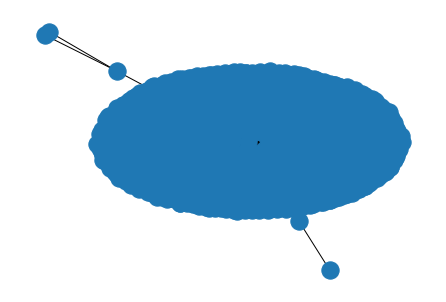

In [11]:
nx.draw(G_com_0_leiden)

In [12]:
df=make_node_df(G_com_0_leiden)
links=make_edge_df(G_com_0_leiden)

# Extract a sample for Test

In [13]:
df_sample = df.sample(frac = 0.05, axis = "index")
# for real data do: df_sample = df.sample(frac = 0.1, axis = "index") # frac is the fraction of rows nodes to start with
df_sample

,node
1489,1424372867114754050
403,344164709
75,22648912
1168,1019777427499814914
1557,1470403265166778373
...,...
1014,826828633968824321
1049,856150089412132865
709,2375329118
12,15651835


In [14]:
df_sample_set = set(df_sample["node"])

In [15]:
# linkage step: now i need to only take the links that are from or to a node included in the sample.
# these links are the "chosen links"
# second step is take the nodes that "chosen links" point to or come from (same thing) and add these nodes to the set
# end.
# if i then repeat the "linkage step", i would get gradually a bigger net until i eventually get all the net.
# therefore I just end where I end (after only one "linkage step" and one addition of "chosen links")
# mindful that this subnet as composed does not include all links originating from nodes in the subnet.
# therefore I'm not sure if this approach is sound or not. Can't think of a better one, though.


In [16]:
g_test = nx.Graph()
g_test.add_nodes_from(df_sample_set)
g_test.nodes

NodeView((1299465448098942976, 1231229549825970177, 1424372867114754050, 1019777427499814914, 944020385053454336, 1470403265166778373, 745890091025960960, 1427079687767879682, 826231533962944512, 1371858457226309641, 1289592995235483649, 2855440393, 1345398631403315212, 884026896803037185, 1469332931130834952, 821185169126293506, 2857659911, 1500612226578800649, 1348047826392121349, 279337502, 316529697, 276695591, 247803955, 2356750394, 1681616449, 2912442951, 2249718348, 22648912, 4765848672, 1308622442, 17471611, 1365399022987399168, 33221250, 1500989746574774272, 1152116052362432513, 1051965121210142721, 823266028637589505, 806625064993116161, 826828633968824321, 242131602, 2155930262, 797553658657378310, 403347105, 1325125985491095559, 560817896, 290593287, 1292975794763882496, 1216201241157607424, 806839555, 754455561417089024, 1342128007201382400, 1075380589333766145, 1436984385438375938, 623030031, 798369918244634624, 63793432, 1489080240487997446, 374699298, 1286336292, 856150

In [17]:
#while g.edges>=len(df)*20/100
for node in g_test.nodes:
    #print(f"Working on {node}")

    one = links[links["source"] == node]
    two = links[links["target"] == node]
    subset_of_links = pd.concat((one, two))
    #if len(subset_of_links) > 1:
        #print(f"We found {len(subset_of_links)} links")

    if not subset_of_links.empty:
        new_graph = nx.from_pandas_edgelist(subset_of_links)
        g_test = nx.compose(g_test, new_graph)

In [18]:
#g.nodes

In [19]:
#g.edges

In [20]:
len(g_test.nodes)

83

In [21]:
len(g_test.edges)

82

In [22]:
len(df_sample)

82

TEST
number of nodes = 83 
number of edges = 82


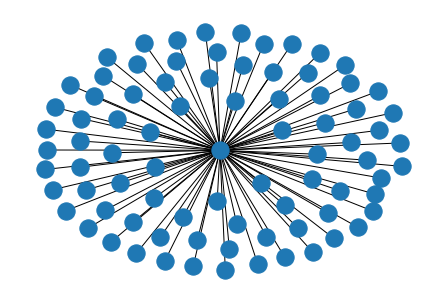

In [23]:
g_test.remove_edges_from(list(nx.selfloop_edges(g_test))) #rimuovere selfloops
g_test.remove_nodes_from(list(nx.isolates(g_test)))       #rimuovere nodi isolati


nx.draw(g_test)
print('TEST')
print('number of nodes = {} \n'
    'number of edges = {}'.format(g_test.number_of_nodes(), g_test.number_of_edges()))

In [24]:
#create train
df_train = pd.concat([df,df_sample]).drop_duplicates(keep=False)
df_train

,node
0,4615341
1,11486222
2,14410543
3,14491785
4,14542602
...,...
1631,1500221417836720140
1634,1501098961653825537
1635,1501718522241507328
1636,1502396616187146240


In [25]:
G_train = nx.Graph()

In [26]:
for i,e in df_train.iterrows():
    G_train.add_node(df_train['node'][i]) #, category=df_train['category'][i])

In [27]:
lista_nodi=[]
for n in df_train['node']:
    lista_nodi.append(n)
len(lista_nodi)

1556

In [28]:
for i,e in links.iterrows():
    if (links['source'][i]) in lista_nodi and (links['target'][i]) in lista_nodi:
        G_train.add_edge(links['source'][i],links['target'][i])

TRAIN
number of nodes = 1556 
number of edges = 1556 



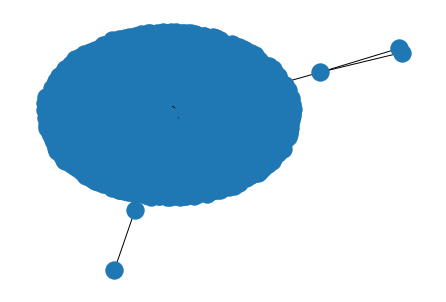

In [29]:
G.remove_edges_from(list(nx.selfloop_edges(G_train))) #rimuovere selfloops
G.remove_nodes_from(list(nx.isolates(G_train)))       #rimuovere nodi isolati
c=0
th=500
for component in list(nx.connected_components(G_train)):
    c += 1
    if len(component)<th:
        for node in component:
            G_train.remove_node(node)
print('TRAIN')
print('number of nodes = {} \n'
    'number of edges = {} \n'.format(G_train.number_of_nodes(), G_train.number_of_edges()))
nx.draw(G_train)

# Link prediction

In [30]:
import linkpred
%matplotlib inline 

In [31]:
cn = linkpred.predictors.CommonNeighbours(G_train, excluded=G_train.edges()) # We aim to predict only new links, thus we exclude existing ones
cn_results = cn.predict()

top = cn_results.top()
for edge, score in top.items():
    print(edge, score)

1502695274241826818 - 1502396616187146240 1.0
1502695274241826818 - 1501718522241507328 1.0
1502695274241826818 - 1501098961653825537 1.0
1502695274241826818 - 1500221417836720140 1.0
1502695274241826818 - 1500110506694172676 1.0
1502695274241826818 - 1499801906121687045 1.0
1502695274241826818 - 1499467322725216261 1.0
1502695274241826818 - 1499278248169152513 1.0
1502695274241826818 - 1499216402389114883 1.0
1502695274241826818 - 1499101516355014664 1.0


In [36]:
jc = linkpred.predictors.Jaccard(G_train, excluded=G_train.edges())
jc_results = jc.predict()

top = jc_results.top()
for edge, score in top.items():
    print(edge, score)

1498343577595879426 - 1477926995522633733 1.0
1498343577595879426 - 1298689854067417088 1.0
1498343577595879426 - 1210233737356730368 1.0
1498343577595879426 - 991324136856346626 1.0
1498343577595879426 - 902502004106383360 1.0
1498343577595879426 - 857613780641095681 1.0
1498343577595879426 - 191461705 1.0
1496930904157175810 - 1496408061094805506 1.0
1496930904157175810 - 1495834618888609802 1.0
1496930904157175810 - 1486651699750133764 1.0


In [37]:
aa = linkpred.predictors.AdamicAdar(G_train, excluded=G_train.edges())
aa_results = aa.predict()

top = aa_results.top()
for edge, score in top.items():
    print(edge, score)

1401015246718914560 - 2202063265 34.001790816711356
2616995078 - 2202063265 25.98986206492185
790870659333259264 - 2202063265 19.533615562268196
1401015246718914560 - 1317817827970134025 16.820108216707595
1317817827970134025 - 2616995078 14.649281276879059
1401015246718914560 - 2616995078 12.982520858223618
1401015246718914560 - 820731335157383170 12.491314803487413
2202063265 - 316797199 11.97479711117728
1317817827970134025 - 790870659333259264 11.096982327895715
1401015246718914560 - 316797199 8.675521272914471


# Evaluation and comparison of different predictors

In [32]:
import random
import itertools
from linkpred.evaluation import Pair

# Node set
nodes = list(G_train.nodes())
nodes.extend(list(g_test.nodes()))

# Compute the test set and the universe set
test = [Pair(i) for i in g_test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [33]:
len(universe)

1340703

In [34]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

KeyboardInterrupt: 

In [ ]:
cn_evaluation.recall()

In [ ]:
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

In [ ]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [ ]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

In [ ]:


print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")